In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from collections import Counter

import matplotlib.pyplot as plt

In [3]:
centers = [[0,0,0], [-2, -2, 0], [2, 2,1], [1,3,2]] # Number of blobs

Y, labels_true = make_blobs(
    n_samples=750, n_features=3, centers=centers, cluster_std=0.4, random_state=0
)
Y = StandardScaler().fit_transform(Y)

print(type(Y))
print(Y)

<class 'numpy.ndarray'>
[[-0.6070849  -0.33939153 -0.96464568]
 [ 0.9979049   0.45290839  0.35435285]
 [-1.26764161 -1.11649618 -0.92221497]
 ...
 [ 1.66004653  0.75243426  0.43750308]
 [ 0.2642764   0.94895765  1.41887691]
 [ 0.53323976  0.82247913  1.81628187]]


In [4]:
#change eps (epsilon) to desired value

db = DBSCAN(eps=0.3, min_samples=10).fit(Y)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

print(core_samples_mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False  True  True  True  True False  True False  True  True  True
  True False False  True False  True False False  True False  True  True
  True  True  True  True  True False False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True False  True  True False  True
  True False  True  True  True False  True False  True  True False False
 False  True  True  True  True  True  True False  True  True  True  True
  True  True False  True False  True False  True  True  True False  True
  True False  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False  True  True  T

In [5]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

750 
 750 
 750


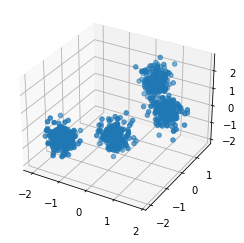

In [6]:
## unclustered data

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(
    Y[:,0],
    Y[:,1],
    Y[:,2]
)

print(
    len(Y[:,0]), '\n',
    len(Y[:,1]), '\n',
    len(Y[:,2])
)

In [7]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]


shape: (133, 3)
shape: (33, 3)
<class 'numpy.ndarray'>
count 166 
it 1


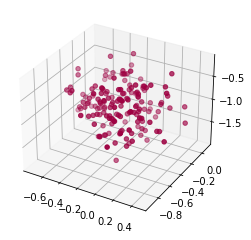

In [9]:
## clustered data
fig = plt.figure()
ax = plt.axes(projection='3d')

count = 0
it = 0

for k, col in zip(unique_labels, colors):
    it+=1
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xyz = Y[class_member_mask & core_samples_mask]
    print('shape:',np.shape(xyz))
    count+=len(xyz)
    ax.scatter3D(
        xyz[:, 0],
        xyz[:, 1],
        xyz[:, 2],
        color=tuple(col)
    )
    
    xyz = Y[class_member_mask & ~core_samples_mask]
    print('shape:',np.shape(xyz))
    print(type(xyz))
    count+=len(xyz)
    ax.scatter3D(
        xyz[:, 0],
        xyz[:, 1],
        xyz[:, 2],
        color=tuple(col)
    )
    if(it == 1): break
print("count", count, '\nit',it)